# ch05 (2) matplotlib 2

사인, 코사인 함수의 값을  -10~10 사이에 0.1간격으로 그래프를 하나의 차트에 그려라. 
단, 타이틀을 sin/cos chart, legend = 우상위치, 색은 빨강, 파랑, 선스타일 솔리드, 대시드로 각각 하라.

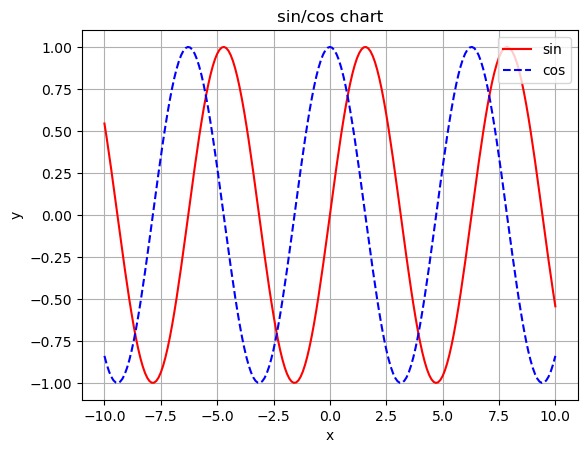

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10.1, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin, color='red', linestyle='solid', label='sin')
plt.plot(x, y_cos, color='blue', linestyle='dashed', label='cos')

plt.title("sin/cos chart")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## ch05 (3) matplotlib

삼성전자, 하이닉스, LG화학 종목의 최근 5일 일간 주가변동율을 matplotlib과 seaborn을 이용하여 히트맵을 그리는 프로그램을 작성하고, 코드와 실행결과 캡처본을 올리시오.

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# macOS
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [31]:
tickers = ['005930.KS', '000660.KS', '051910.KS']  # 삼성전자, 하이닉스, LG화학
company_names = ['삼성전자', '하이닉스', 'LG화학']

In [32]:
data = yf.download(tickers, period='6d', auto_adjust=False)

adj_close = data['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [35]:
pct_change = adj_close.pct_change() * 100
pct_change = pct_change.iloc[1:]

pct_change.index = pct_change.index.strftime('%y-%m-%d')

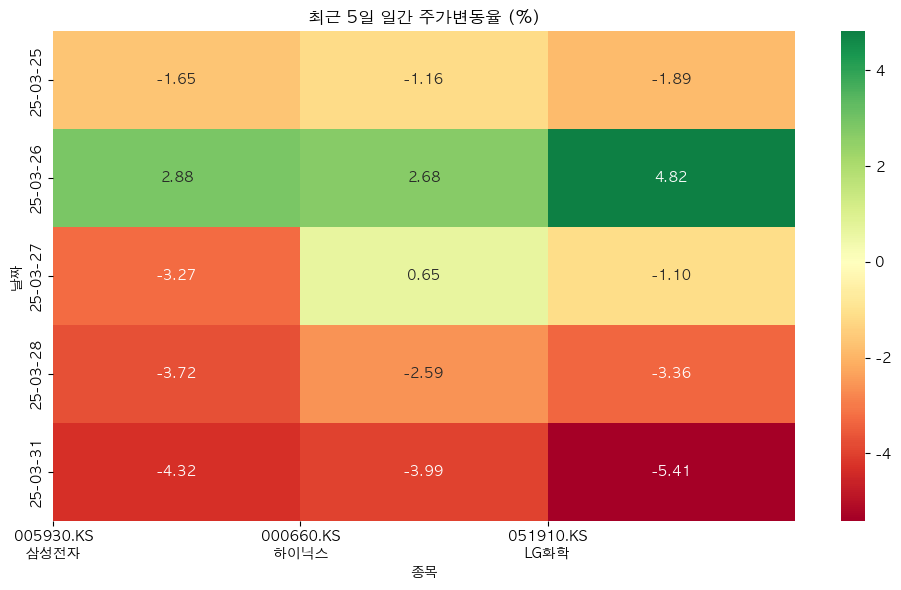

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pct_change, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title("최근 5일 일간 주가변동율 (%)")
plt.xlabel("종목")
plt.ylabel("날짜")

new_labels = [f"{ticker}\n{company}" for ticker, company in zip(tickers, company_names)]
plt.xticks(ticks=np.arange(len(tickers)), labels=new_labels, rotation=0)

plt.tight_layout()
plt.show()

## ch05 (2) seaborn

1. 삼성전자 한 종목에 대해서, 최근 5영업일간의 종가를 y축에, 날짜를 x축에, 그리고 거래량을 버블 크기로 표현한 seaborn 버블 차트를 만드는 코드와 캡처를 올려라.
 
2. 삼성전자 한 종목에 대해서, 최근 5영업일간의 종가를 y축에, 날짜를 x축에, 그리고 거래량을 색으로 표현하는 히트맵을 만드는 코드와 캡처를 올려라.
 
참고) 주식데이터 얻는 방법
FinnanceDataReader: https://wikidocs.net/227292
Pykrx
yfinance
한국증권제공: https://www.truefriend.com/main/customer/tradetransfer/_static/TF04da010000.jsp

### 1. 버블 차트 (Seaborn 사용)

In [39]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# macOS
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [40]:
df = yf.download(['005930.KS'], period='5d', auto_adjust=True)
print("원본 컬럼:", df.columns)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)
print("변경 후 컬럼:", df.columns)

df.reset_index(inplace=True)

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
print("변환 후 데이터 미리보기:\n", df.head())

[*********************100%***********************]  1 of 1 completed

원본 컬럼: MultiIndex([( 'Close', '005930.KS'),
            (  'High', '005930.KS'),
            (   'Low', '005930.KS'),
            (  'Open', '005930.KS'),
            ('Volume', '005930.KS')],
           names=['Price', 'Ticker'])
변경 후 컬럼: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
변환 후 데이터 미리보기:
 Price        Date    Close     High      Low     Open    Volume
0      2025-03-26  61400.0  61400.0  59700.0  59800.0  16431645
1      2025-03-27  61800.0  62000.0  60800.0  60900.0  20389790
2      2025-03-28  60200.0  61100.0  60000.0  60700.0  16282514
3      2025-03-31  57800.0  59700.0  57800.0  59500.0  17633494
4      2025-04-01  58800.0  59600.0  57900.0  58700.0  13841706


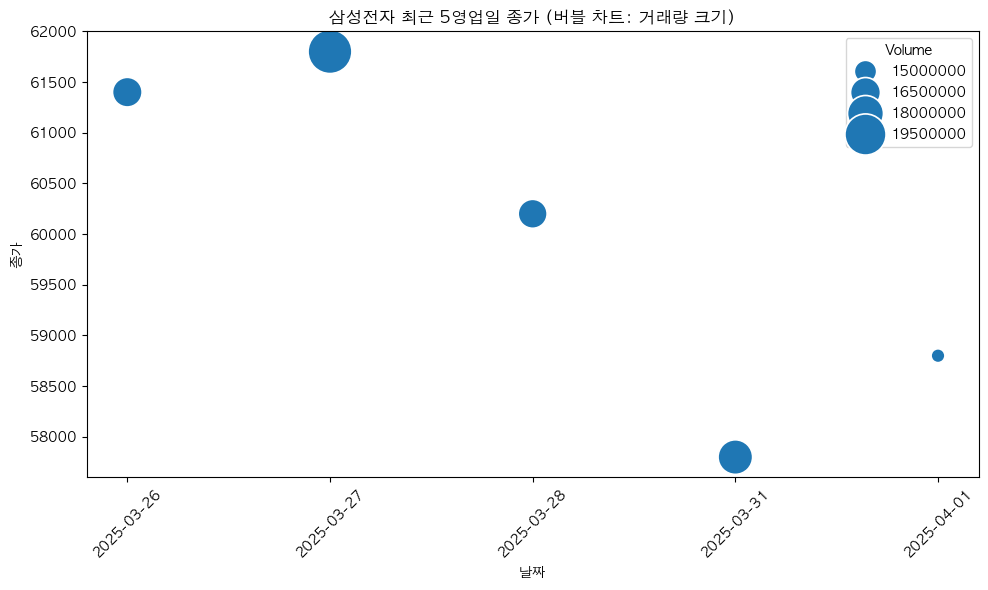

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Date', 
    y='Close', 
    size='Volume',           
    sizes=(100, 1000),     
    legend='brief'
)
plt.title("삼성전자 최근 5영업일 종가 (버블 차트: 거래량 크기)")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. 색상으로 거래량 표현한 히트맵 스타일 차트

In [42]:
heatmap_data = df.set_index('Date')[['Volume']]
annot_data = df.set_index('Date')[['Close']]

In [43]:
heatmap_data = heatmap_data.T
annot_data = annot_data.T

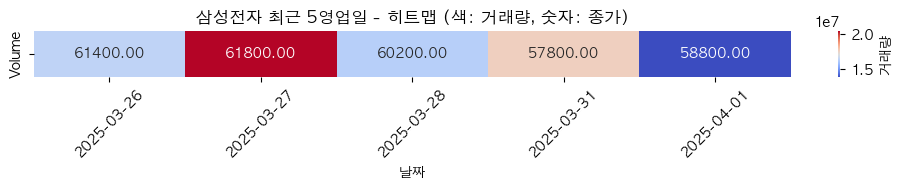

In [ ]:
plt.figure(figsize=(10, 2))
ax = sns.heatmap(heatmap_data, cmap='coolwarm', annot=annot_data, fmt=".2f", cbar_kws={'label': '거래량'})
plt.title("삼성전자 최근 5영업일 - 히트맵 (색: 거래량, 숫자: 종가)")
plt.xlabel("날짜")
plt.ylabel("") 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()